In [48]:
library(tidyverse)
library(assertthat)
library(xtable)

In [49]:
plot_theme <- theme_classic() + 
    theme(strip.background = element_blank(),
          plot.title = element_text(hjust = 0.5),
          plot.subtitle = element_text(hjust = 0.5))

### Evaluation of SubSVDD against benchmark data set 

In [50]:
path <- "../../data/output/evaluation-part2.csv"
data <- read_csv(path, col_types = cols(id=col_character(),
   c_start_quality=col_skip(), c_end_quality=col_skip(), c_maximum=col_skip(), c_ramp_up=col_skip(), c_quality_range=col_skip(), c_total_quality_range=col_skip(), c_average_end_quality=col_skip(),
   c_average_quality_change=col_skip(), c_average_gain=col_skip(), c_average_loss=col_skip(), c_learning_stability=col_skip(), c_ratio_of_outlier_queries=col_skip(), auc_start_quality=col_skip(), 
   auc_end_quality=col_skip(), auc_maximum=col_skip(), auc_ramp_up=col_skip(), auc_quality_range=col_skip(), auc_total_quality_range=col_skip(), auc_average_end_quality=col_skip(), 
   auc_average_quality_change=col_skip(), auc_average_gain=col_skip(), auc_average_loss=col_skip(), auc_learning_stability=col_skip(), auc_ratio_of_outlier_queries=col_skip(), 
   pauc_start_quality=col_skip(), pauc_end_quality=col_skip(), pauc_maximum=col_skip(), pauc_ramp_up=col_skip(), pauc_quality_range=col_skip(), pauc_total_quality_range=col_skip(),
   pauc_average_end_quality=col_skip(), pauc_average_quality_change=col_skip(), pauc_average_gain=col_skip(), pauc_average_loss=col_skip(), pauc_learning_stability=col_skip(), 
   pauc_ratio_of_outlier_queries=col_skip()))

In [51]:
data %>%
#     group_by(exit_code, weight_update_strategy, data_set) %>%
    group_by(exit_code, data_set) %>%
    count()

exit_code,data_set,n
<chr>,<chr>,<int>
success,HeartDisease,900
success,Stamps,900


In [52]:
plotVar <- data %>%
    mutate(file_version = str_extract(file_name, "v\\w{2}"))  %>%
    filter(exit_code == "success") %>%
    select(data_set, file_version, num_subspaces, max_size_subspaces, model, qs, qs_combination_fct, weight_update_strategy, m_average_end_quality, m_quality_range, m_end_quality, m_ramp_up, m_ratio_of_outlier_queries, initial_pool_resample_version)

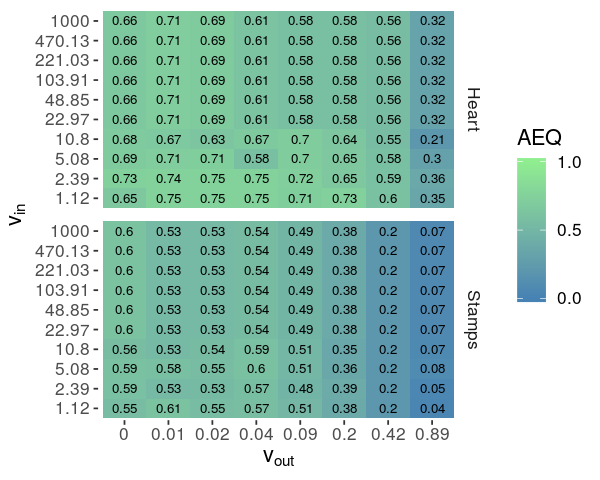

In [53]:
options(repr.plot.width=5, repr.plot.height=4)

plotVar %>% 
    mutate(data_set = ifelse(data_set == "HeartDisease", "Heart", data_set))%>%
    extract(weight_update_strategy, c("v_out", "v_in"), "(?:_)(\\d*\\.\\d*)(?:-in_)(\\d*\\.\\d*$)") %>%
    mutate(v_in = as.factor(round(as.numeric(v_in), 2)), v_out = as.factor(round(as.numeric(v_out), 2))) %>%
    group_by(data_set, v_in, v_out) %>%
    summarize(median_AEQ = median(m_average_end_quality)) %>%
ggplot(aes(v_out, v_in)) +
    labs(fill="AEQ", x=expression(v["out"]), y=expression(v["in"])) +
    geom_tile(aes(fill=median_AEQ)) +
    facet_grid(rows = vars(data_set)) +
    plot_theme + 
    geom_text(aes(label = round(median_AEQ, 2)), size = 2.8) +
    scale_fill_gradient(high = "lightgreen",  low = "steelblue", breaks = c(0, 0.5, 1.0), limits = c(0,1)) +
    theme(axis.line = element_blank(),
         text = element_text(size=13))

In [54]:
ggsave("../plots/v_comparison.pdf", 
       width = 5.5,
       height = 3.2,
       plot = last_plot(), device = "pdf")